In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/scores_data.csv")

In [3]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [5]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [7]:
df.columns = df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [11]:
df.shape

(149, 3)

In [12]:
df.tail()



,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [18]:
def map_grade(score):
  score = score.split("/")[0].strip()
  score = int(score)
  return score

In [19]:
df["numerical_score_out_of_7"] = df["Score"].apply(map_grade)

In [20]:
df.head()

,Batch,User_ID,Score,numerical_score_out_of_7
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


In [21]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0
numerical_score_out_of_7,0


In [22]:
df["Batch"].value_counts()

,count
Batch,
AI_ELITE_7,53
AI_ELITE_6,48
AI_ELITE_4,48


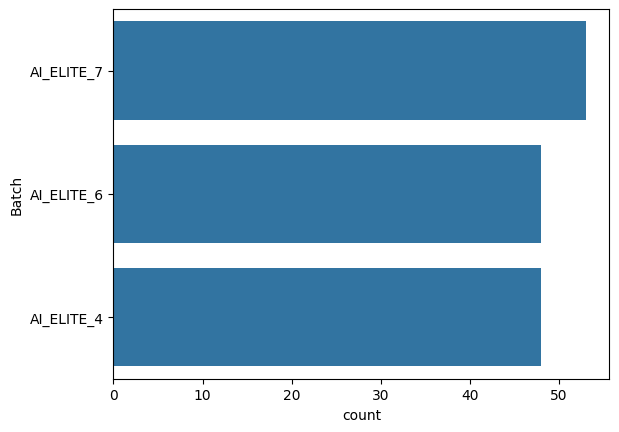

In [33]:
sns.countplot(df["Batch"])
plt.show()

In [31]:
df["User_ID"].unique()

array(['uid_149', 'uid_148', 'uid_147', 'uid_146', 'uid_145', 'uid_144',
       'uid_143', 'uid_142', 'uid_141', 'uid_140', 'uid_139', 'uid_138',
       'uid_137', 'uid_136', 'uid_135', 'uid_134', 'uid_133', 'uid_132',
       'uid_131', 'uid_130', 'uid_129', 'uid_128', 'uid_127', 'uid_126',
       'uid_125', 'uid_124', 'uid_123', 'uid_122', 'uid_121', 'uid_120',
       'uid_119', 'uid_118', 'uid_117', 'uid_116', 'uid_115', 'uid_114',
       'uid_113', 'uid_112', 'uid_111', 'uid_110', 'uid_109', 'uid_108',
       'uid_107', 'uid_106', 'uid_105', 'uid_104', 'uid_103', 'uid_102',
       'uid_101', 'uid_100', 'uid_99', 'uid_98', 'uid_97', 'uid_96',
       'uid_95', 'uid_94', 'uid_93', 'uid_92', 'uid_91', 'uid_90',
       'uid_89', 'uid_88', 'uid_87', 'uid_86', 'uid_85', 'uid_84',
       'uid_83', 'uid_82', 'uid_81', 'uid_80', 'uid_79', 'uid_78',
       'uid_77', 'uid_76', 'uid_75', 'uid_74', 'uid_73', 'uid_72',
       'uid_71', 'uid_70', 'uid_69', 'uid_68', 'uid_67', 'uid_66',
       'uid_

In [32]:
df["numerical_score_out_of_7"].describe()

,numerical_score_out_of_7
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


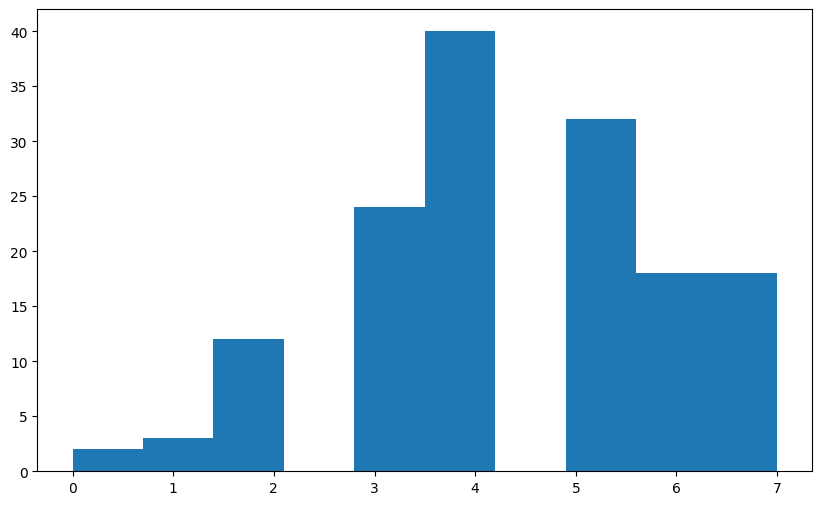

In [34]:
plt.figure(figsize=(10,6))
plt.hist(df["numerical_score_out_of_7"])
plt.show()

The histogram shows the distribution of the dataset across different value ranges. Most observations are concentrated between 3–4 and 5–6, indicating higher frequency in these intervals. The distribution is not uniform and appears bimodal, suggesting the presence of two clusters. Very few values occur at the lower end of the scale.


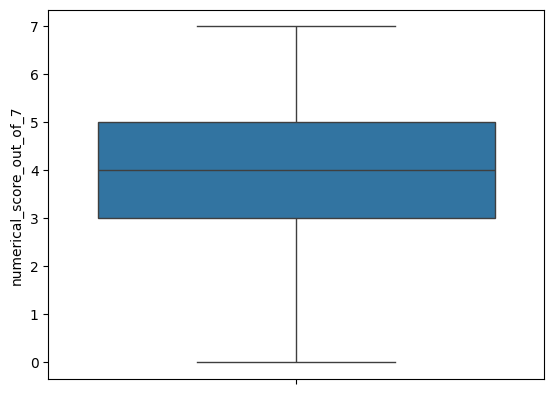

In [35]:
sns.boxplot(df['numerical_score_out_of_7'])
plt.show()

In [37]:
df.groupby("Batch")["numerical_score_out_of_7"].median()

,numerical_score_out_of_7
Batch,
AI_ELITE_4,4.0
AI_ELITE_6,4.0
AI_ELITE_7,5.0


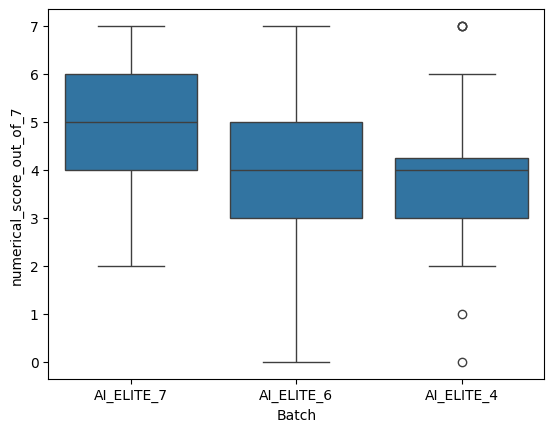

In [39]:
sns.boxplot(x='Batch', y='numerical_score_out_of_7', data=df)
plt.show()

The boxplot reveals that AI_ELITE_7 has the highest median score, indicating superior overall performance with consistent results. AI_ELITE_6 exhibits greater variability in scores, including very low values, suggesting inconsistent performance. AI_ELITE_4 shows a narrow interquartile range but contains several outliers, indicating the presence of both weak and exceptional performers. Overall, AI_ELITE_7 emerges as the best-performing batch.

In [43]:
user_avg = (
    df.groupby('User_ID')['numerical_score_out_of_7']
      .mean()
      .reset_index()
)

user_avg.head()

,User_ID,numerical_score_out_of_7
0,uid_1,2.0
1,uid_10,7.0
2,uid_100,3.0
3,uid_101,6.0
4,uid_102,4.0


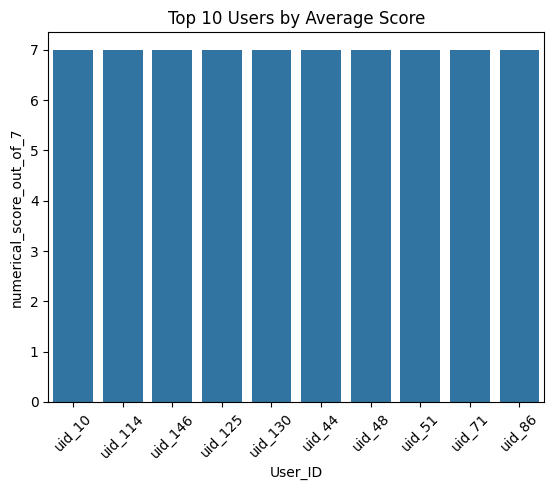

In [44]:
top_users = user_avg.sort_values(
    by='numerical_score_out_of_7',
    ascending=False
).head(10)

sns.barplot(
    x='User_ID',
    y='numerical_score_out_of_7',
    data=top_users
)
plt.xticks(rotation=45)
plt.title("Top 10 Users by Average Score")
plt.show()

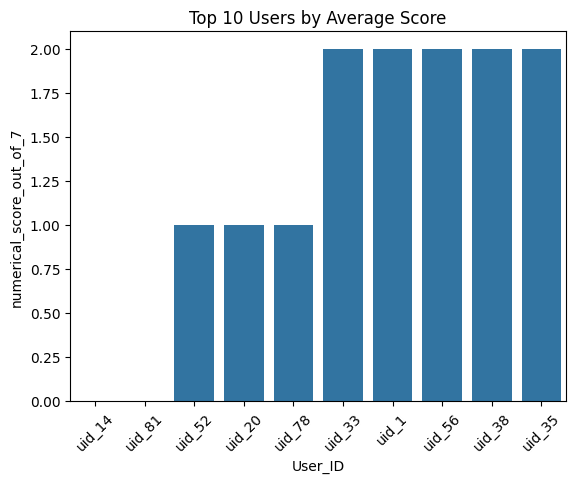

In [46]:
bottom_users = user_avg.sort_values(
    by='numerical_score_out_of_7'
).head(10)

sns.barplot(
    x='User_ID',
    y='numerical_score_out_of_7',
    data=bottom_users
)
plt.xticks(rotation=45)
plt.title("Top 10 Users by Average Score")
plt.show()

In [47]:
df.groupby('Batch')['numerical_score_out_of_7'].agg(
    ['mean', 'median', 'std', 'min', 'max']
)

,mean,median,std,min,max
Batch,,,,,
AI_ELITE_4,3.791667,4.0,1.443376,0,7
AI_ELITE_6,4.229167,4.0,1.640441,0,7
AI_ELITE_7,5.056604,5.0,1.446682,2,7


<Axes: xlabel='Batch', ylabel='numerical_score_out_of_7'>

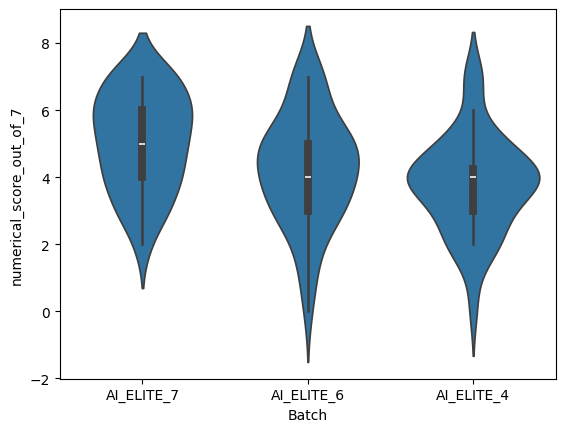

In [49]:
sns.violinplot(
    x='Batch',
    y='numerical_score_out_of_7',
    data=df
)

In [50]:
ai_elite_4_df = df[df['Batch'] == 'AI_ELITE_4']

Q1 = ai_elite_4_df['numerical_score_out_of_7'].quantile(0.25)
Q3 = ai_elite_4_df['numerical_score_out_of_7'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ai_elite_4_df[
    (ai_elite_4_df['numerical_score_out_of_7'] < lower_bound) |
    (ai_elite_4_df['numerical_score_out_of_7'] > upper_bound)
]

print(f"Q1 for AI_ELITE_4: {Q1}")
print(f"Q3 for AI_ELITE_4: {Q3}")
print(f"IQR for AI_ELITE_4: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")
print("Outliers in AI_ELITE_4 batch:")
print(outliers)

Q1 for AI_ELITE_4: 3.0
Q3 for AI_ELITE_4: 4.25
IQR for AI_ELITE_4: 1.25
Lower bound for outliers: 1.125
Upper bound for outliers: 6.125
Outliers in AI_ELITE_4 batch:
          Batch User_ID  Score  numerical_score_out_of_7
101  AI_ELITE_4  uid_48  7 / 7                         7
105  AI_ELITE_4  uid_44  7 / 7                         7
129  AI_ELITE_4  uid_20  1 / 7                         1
135  AI_ELITE_4  uid_14  0 / 7                         0
139  AI_ELITE_4  uid_10  7 / 7                         7


In [51]:
print("Outliers (User_ID and Score) in AI_ELITE_4 batch:")
print(outliers[['User_ID', 'numerical_score_out_of_7']])

Outliers (User_ID and Score) in AI_ELITE_4 batch:
    User_ID  numerical_score_out_of_7
101  uid_48                         7
105  uid_44                         7
129  uid_20                         1
135  uid_14                         0
139  uid_10                         7


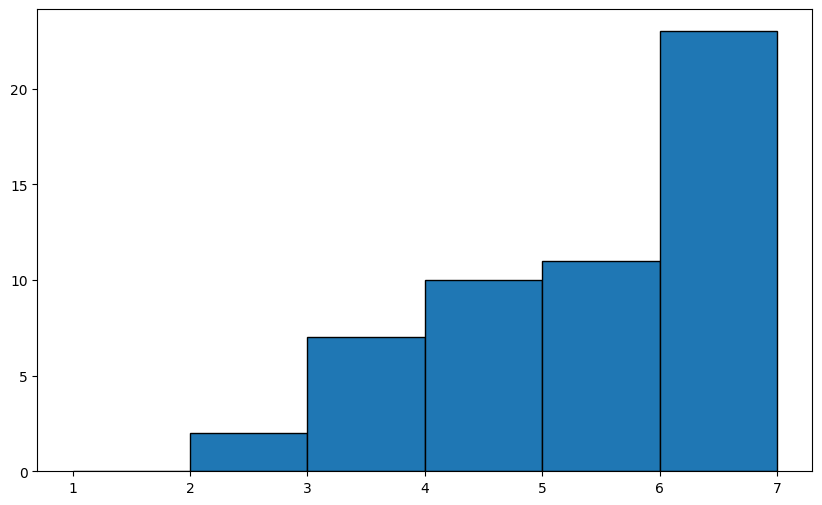

In [56]:
plt.figure(figsize=(10,6))
df_elite7 = df[df["Batch"] == "AI_ELITE_7"]
plt.hist(df_elite7["numerical_score_out_of_7"], bins=range(1, 8), edgecolor='black')
plt.show()

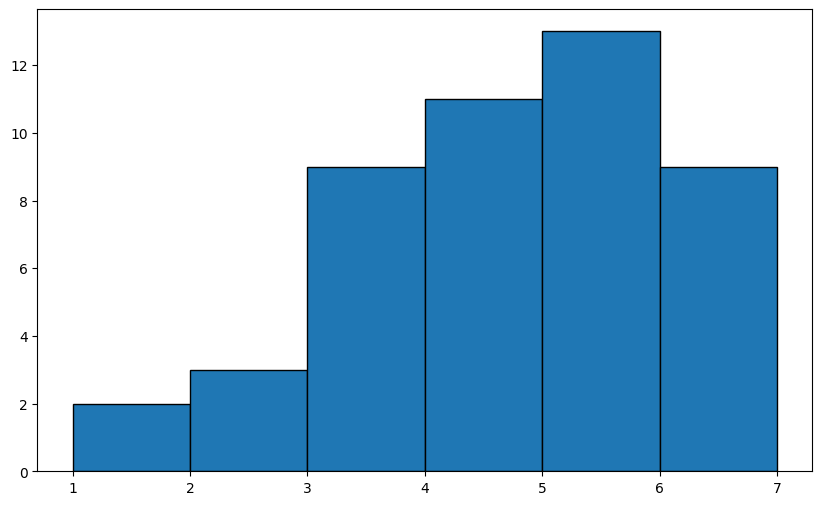

In [57]:
plt.figure(figsize=(10,6))
df_elite6 = df[df["Batch"] == "AI_ELITE_6"]
plt.hist(df_elite6["numerical_score_out_of_7"], bins=range(1, 8), edgecolor='black')
plt.show()

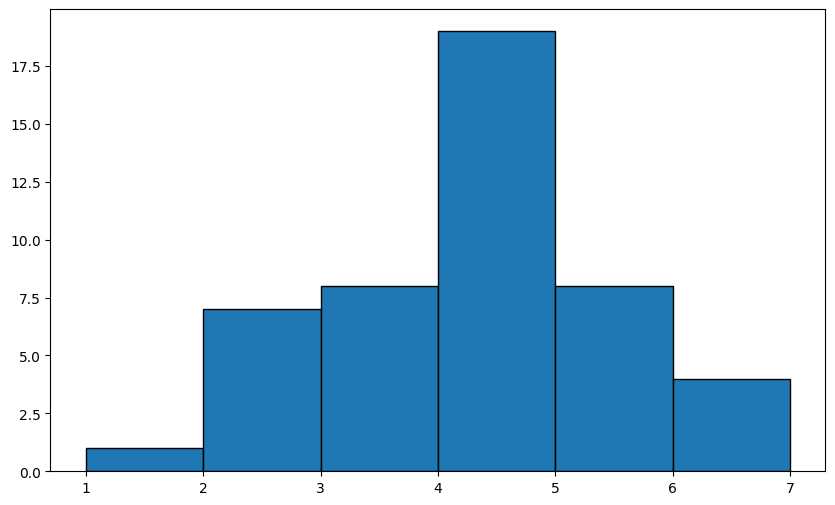

In [59]:
plt.figure(figsize=(10,6))
df_elite4 = df[df["Batch"] == "AI_ELITE_4"]
plt.hist(df_elite4["numerical_score_out_of_7"], bins=range(1, 8), edgecolor='black')
plt.show()